# Red Wine Quality Prediction Project
# Use machine learning to determine which physiochemical properties make a wine 'good'!

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
url = "https://github.com/dsrscientist/DSData/raw/master/winequality-red.csv"
data = pd.read_csv(url)

# Define a cutoff for wine quality (e.g., 7 or higher as 'good' and the rest as 'not good')
data['quality_label'] = data['quality'].apply(lambda x: 1 if x >= 7 else 0)

# Split the dataset into features (X) and target (y)
X = data.drop(['quality', 'quality_label'], axis=1)
y = data['quality_label']

# Split the data into training and testing sets (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree classifier (you can choose other classifiers as well)
model = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Predict the wine quality labels on the test data
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Generate a classification report
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.871875
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.93       273
           1       0.57      0.51      0.54        47

    accuracy                           0.87       320
   macro avg       0.74      0.72      0.73       320
weighted avg       0.87      0.87      0.87       320



Accuracy: 0.9
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94       273
           1       0.73      0.51      0.60        47

    accuracy                           0.90       320
   macro avg       0.82      0.74      0.77       320
weighted avg       0.89      0.90      0.89       320

ROC-AUC Score: 0.9426778894864001


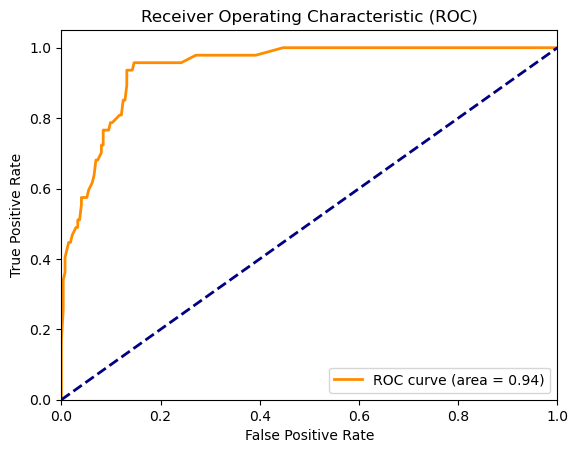

In [11]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

# Step 1: Data Loading
url = "https://github.com/dsrscientist/DSData/raw/master/winequality-red.csv"
data = pd.read_csv(url)

# Step 2: Data Exploration and Preprocessing (as needed)
# No missing data handling is required for this dataset.

# Step 3: Data Preprocessing
# Define a cutoff for wine quality (e.g., 7 or higher as 'good' and the rest as 'not good')
data['quality_label'] = data['quality'].apply(lambda x: 1 if x >= 7 else 0)

# Split the dataset into features (X) and target (y)
X = data.drop(['quality', 'quality_label'], axis=1)
y = data['quality_label']

# Step 4: Feature Selection (as needed)
# You can perform feature selection techniques here if necessary.

# Step 5: Model Selection
# In this example, we'll use a Random Forest Classifier
model = RandomForestClassifier(random_state=42)

# Step 6: Model Training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)

# Step 7: Model Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Calculate ROC-AUC score and plot ROC curve
y_prob = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
fpr, tpr, _ = roc_curve(y_test, y_prob)

# Print results
print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("ROC-AUC Score:", roc_auc)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

Accuracy: 0.85625
Classification Report:
               precision    recall  f1-score   support

           0       0.86      1.00      0.92       273
           1       1.00      0.02      0.04        47

    accuracy                           0.86       320
   macro avg       0.93      0.51      0.48       320
weighted avg       0.88      0.86      0.79       320

ROC-AUC Score: 0.8399579144259995


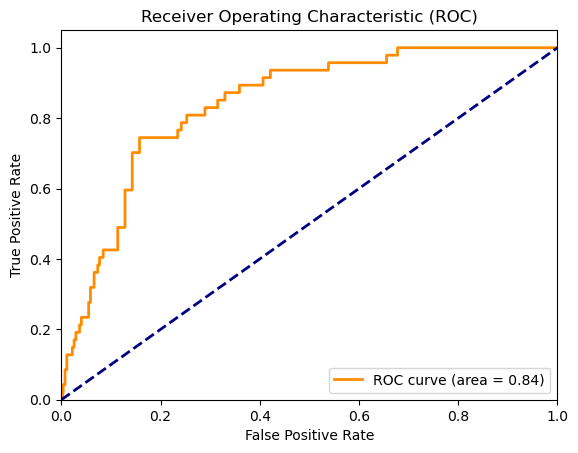

In [12]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

# Step 1: Data Loading
url = "https://github.com/dsrscientist/DSData/raw/master/winequality-red.csv"
data = pd.read_csv(url)

# Step 2: Data Exploration and Preprocessing (as needed)
# No missing data handling is required for this dataset.

# Step 3: Data Preprocessing
# Define a cutoff for wine quality (e.g., 7 or higher as 'good' and the rest as 'not good')
data['quality_label'] = data['quality'].apply(lambda x: 1 if x >= 7 else 0)

# Split the dataset into features (X) and target (y)
X = data.drop(['quality', 'quality_label'], axis=1)
y = data['quality_label']

# Step 4: Feature Selection (as needed)
# You can perform feature selection techniques here if necessary.

# Step 5: Model Selection
# In this example, we'll use a Support Vector Machine (SVM) Classifier
model = SVC(probability=True, random_state=42)

# Step 6: Model Training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)

# Step 7: Model Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Calculate ROC-AUC score and plot ROC curve
y_prob = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
fpr, tpr, _ = roc_curve(y_test, y_prob)

# Print results
print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("ROC-AUC Score:", roc_auc)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

Accuracy: 0.871875
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.93       273
           1       0.57      0.51      0.54        47

    accuracy                           0.87       320
   macro avg       0.74      0.72      0.73       320
weighted avg       0.87      0.87      0.87       320

ROC-AUC Score: 0.7223521159691373


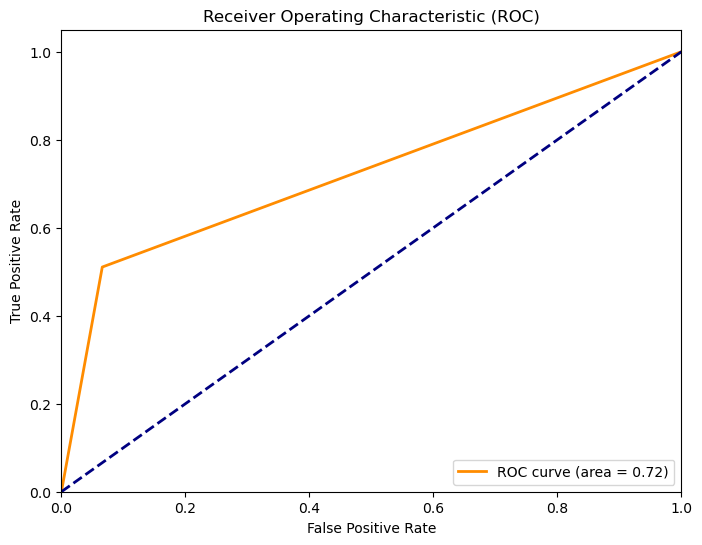

In [14]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc

# Step 1: Data Loading
url = "https://github.com/dsrscientist/DSData/raw/master/winequality-red.csv"
data = pd.read_csv(url)

# Step 2: Data Exploration and Preprocessing (as needed)
# No missing data handling is required for this dataset.

# Step 3: Data Preprocessing
# Define a cutoff for wine quality (e.g., 7 or higher as 'good' and the rest as 'not good')
data['quality_label'] = data['quality'].apply(lambda x: 1 if x >= 7 else 0)

# Split the dataset into features (X) and target (y)
X = data.drop(['quality', 'quality_label'], axis=1)
y = data['quality_label']

# Step 4: Feature Selection (as needed)
# You can perform feature selection techniques here if necessary.

# Step 5: Model Selection
# In this example, we'll use a Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)

# Step 6: Model Training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)

# Step 7: Model Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Calculate ROC curve and AUC
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Print results
print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("ROC-AUC Score:", roc_auc)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()